In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head(5)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [4]:
dataset.drop(['Id'], axis = 1, inplace = True)

In [5]:
dataset.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
2,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
4,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   Attrition                1628 non-null   int64 
 2   BusinessTravel           1628 non-null   object
 3   Department               1628 non-null   object
 4   DistanceFromHome         1628 non-null   int64 
 5   Education                1628 non-null   int64 
 6   EducationField           1628 non-null   object
 7   EmployeeNumber           1628 non-null   int64 
 8   EnvironmentSatisfaction  1628 non-null   int64 
 9   Gender                   1628 non-null   object
 10  JobInvolvement           1628 non-null   int64 
 11  JobRole                  1628 non-null   object
 12  JobSatisfaction          1628 non-null   int64 
 13  MaritalStatus            1628 non-null   object
 14  MonthlyIncome            1628 non-null  

In [7]:
dataset.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

A few inferences - 
1. No missing values in the dataset (good news).
2. 7 non-numeric columns, not necessarily only 7 categorical features. 21 numeric columns.
3. 1628 training samples provided.

# Univariate Analysis

In [8]:
numeric_data = dataset.loc[:, dataset.dtypes != object]
numeric_data = numeric_data.drop('Attrition', axis = 1)

In [9]:
numeric_predictors = list(numeric_data.columns)
ordinal_predictors = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'Behaviour', 'CommunicationSkill', 'StockOptionLevel']
numeric_predictors = list(set(numeric_predictors) - set(ordinal_predictors))

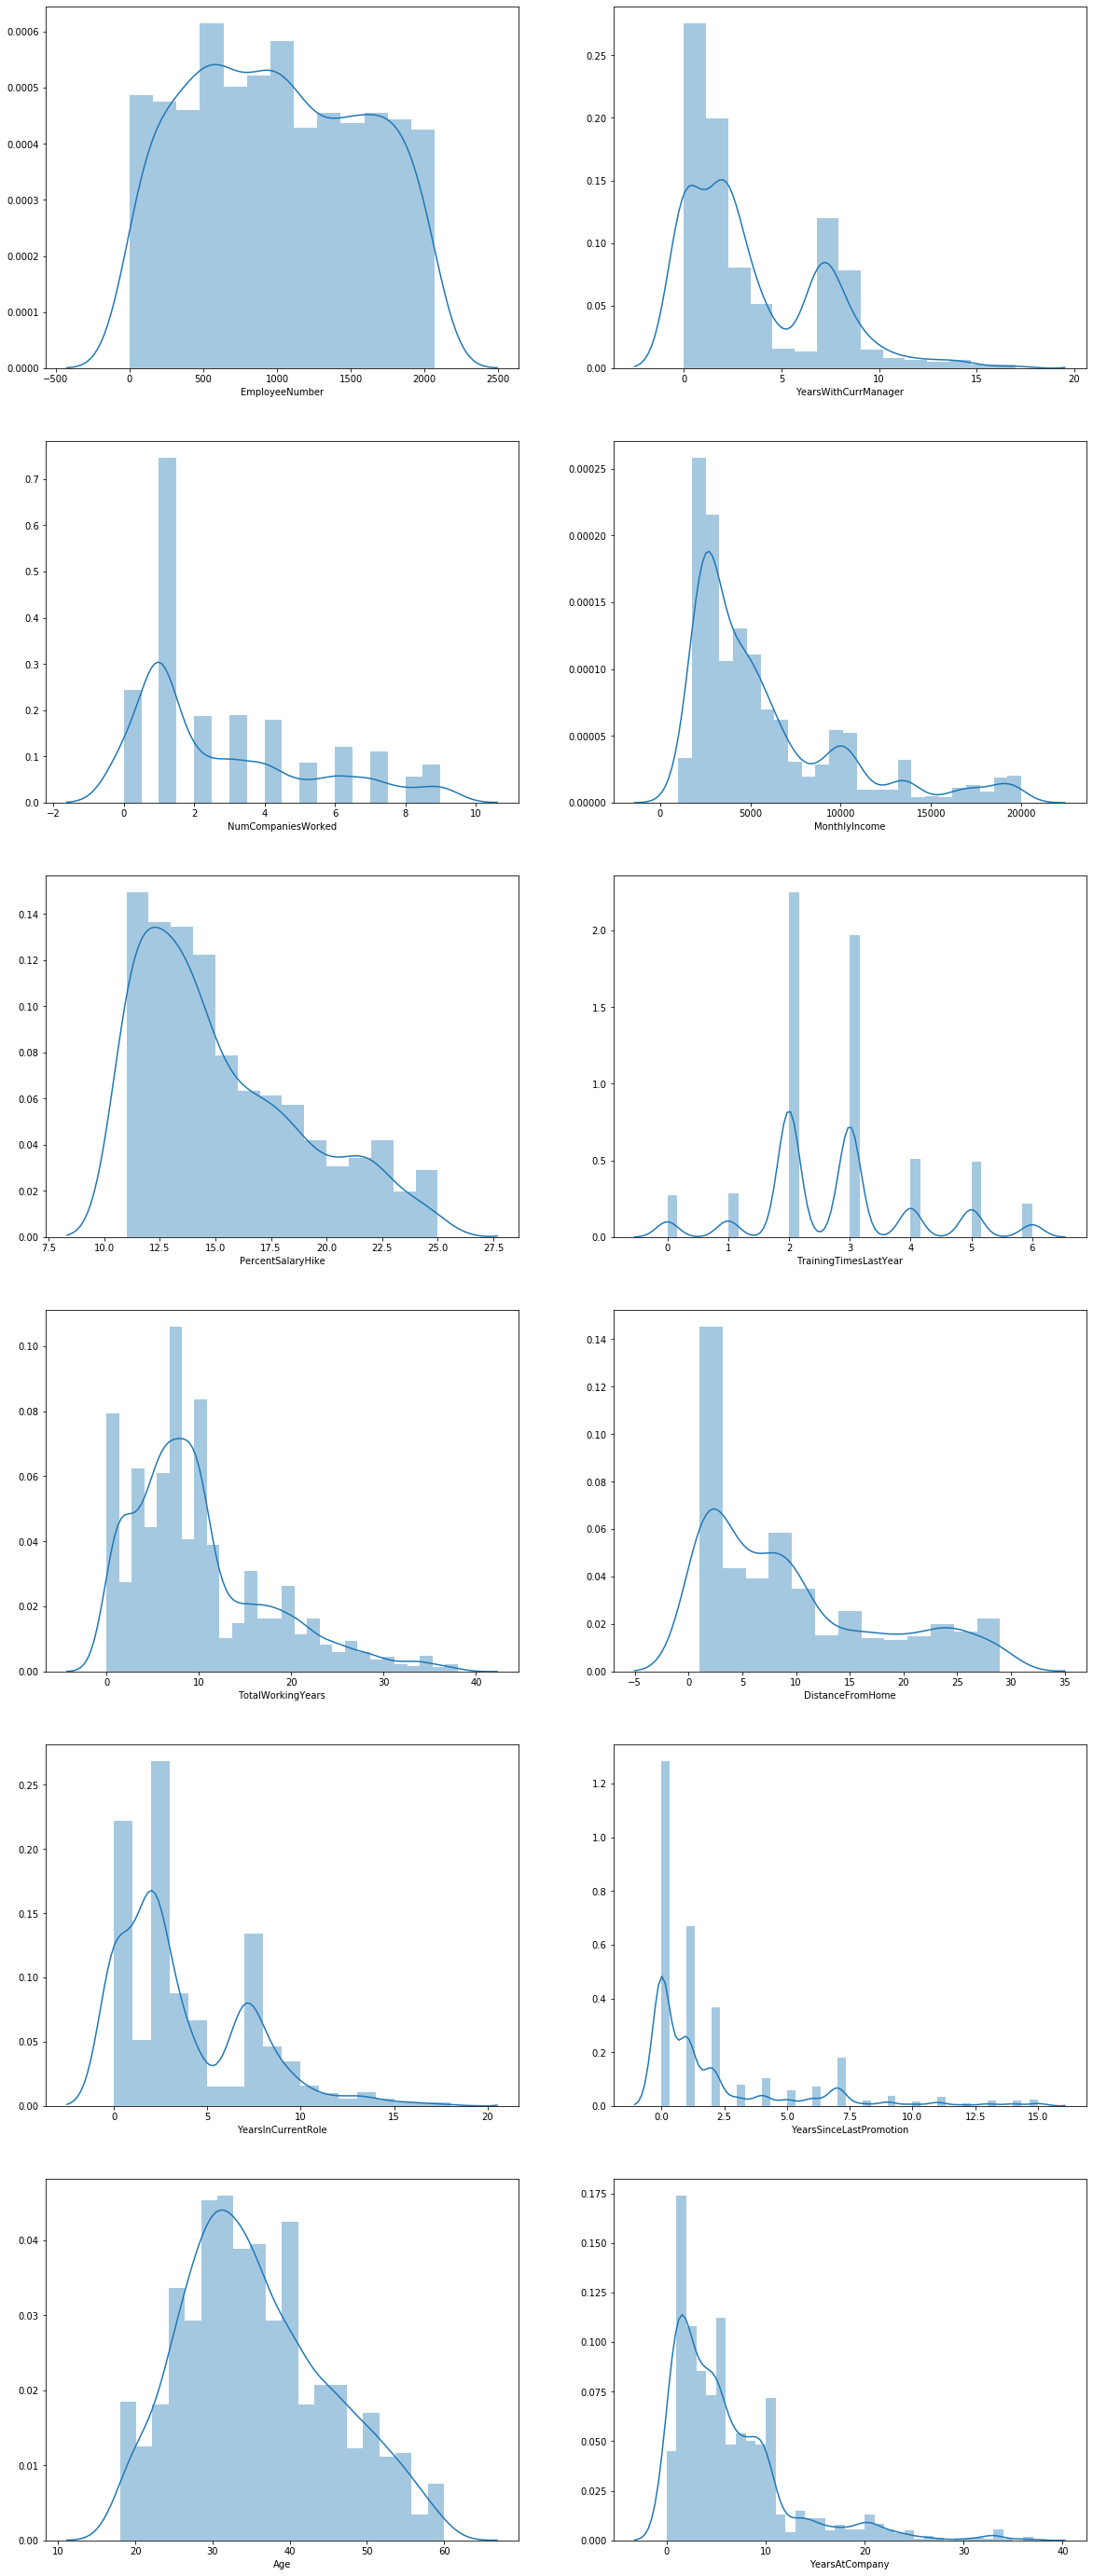

In [69]:
rows = int(len(numeric_predictors) / 2)
fig, axes = plt.subplots(nrows = rows, ncols = 2, figsize = (20, 50))
pointer = 0
for row in range(rows):
    for col in range(2):
        if pointer < len(numeric_predictors): 
            sns.distplot(numeric_data[numeric_predictors[pointer]], ax = axes[row, col])
        pointer += 1

#### Inferences for continuous variables - 
1. `YearsSinceLastPromotion` - This indicates the years that have past since the candidate was last offered any kind of promotion. It can be seen from the plot that there are a lot of employees who have been promoted very recently (in the past few months). This number of employees decrease as the value of this parameter increases - an expected trend. It is very unlikely that many people will go unpromoted for many years. However, there is an unexpected surge around the `7 year` mark. _It might be due to the nature of job - such as janitor or coffee machine handler._ But it is very unlikely that people in such jobs would stay at one place for such a long time. __Examine this anomaly__. Shockingly, the parameter value rises to as large as `15 years`. It might be due to jobs which are stagnant in nature, when it comes to promotion. These might include - CEO, Founder, Co-Founder etc. __It might be informative to explore these high valued samples__. _I am hoping that many of the recently promoted employees didn't leave their jobs_.
    
    
2. `PercentSalaryHike` - This indicates the raise that an employee has received. It seems to vary from ~`10%` to ~`25%`, with less number of employees receiving higher raise. Such a trend is expected - one does expect that the raise in a company would follow such a probability distribution - Geometric of sorts. Hence, the sampled data represents the population well, __no transformation required__.


3. `MonthlyIncome` - This parameter lays out the in-hand salary an employee receives in a month. The distribution is a right-skewed normal distribution, roughly. The range starts from very close to `0` and goes all the way upto `20000`. The hump can be observed around the value `3500`. Such a skewed distribution is also expected - most of the employees do receive salary distributed in a perfectly Gaussian way, with a few tending to earn much more than the common folks, thus making the final ditribution right-skewed. Hence, the sampled data represents the population well, __no transformation required__.


4. `YearsInCurrentRole` - This represents the number of years that an employee has been in his current position, after promotion. From the definition, it seems that this parameter is just another way or representing `YearsSinceLastPromotion`. From the distribution plot, it can be concluded that the above hypothesis is indeed true. __This parameter might be removed from final dataset. Although, I will be examining minutely later on to find out if the hypothesis actually stands__.


5. `NumCompaniesWorked` - This feature represents the number of companies that the employee has served in, before joining IBM. It can be seen that a lot of employees have served in one organization before joining IBM. The values in the parameter range form `0` to `9`. _An implicit assumption: Years of Exp. increases constantly (roughly) with `NumCompaniesWorked`. It means that it is less likely that someone with 3 jobs is less experiences than someone with 2 jobs. We can validate this assumption using the feature - `TotalWorkingYears`_. If this assumption turns out to be true, that would render this paramter uninformative, as a person with 2 prior jobs would be equally likely to jump jobs as a person with 3 prior jobs. _Such a parameter, paired with years of exp., would be useful in finding "jumpers"! and would be a good indicator in decision process_. 

6. `YearsAtCompany` - This parameter states the number of years that an employee has spent in IBM. An expected population might be right-skewed normal distribution. Hence, the sampled data represents the population well, __no transformation required__. There are a few (quite-a-few) employees who have spent `0 - 1 year` in the organization. This doesn't necessarily mean that a lot of them have left, most of them should be "new-joinees". The mode of the data seems to be `1 - 2 years`. _Usually, one would expect an average employee to spend a significant amount of time in an organization before leaping to the next one. A rough decision process would be like - `YearsAtCompany` > 3 (a placeholder figure) -> greater chance of leaving, and `YearsAtCompany` <= 3 -> lesser chance of leaving. There is also another case -> People with very high (say 8) years of experience, are less likely to leave an organization. This might mostly be due to - too settled with the job they have, a sense of loyalty towards their organization, reluctance to go through the hassle of changing jobs etc. Such a trend increases sharply with increase in the value of the paramter_.


7. `TrainingTimesLastYear` - This parameter states the number of trainings an employee has gone through in the last year. It ranges from `0` to `6`, with most of the employees receiving `2` or `3` trainings. I am unsure as to what kind of relation this might have with the `Attrition` tendency of an employee, it remains to be explored. _Although, it might not be very unrealistic to assume that people who have received a higher number of trainings can have a higher `Attrition` probability - not because of their own will, but because of their inability to cope up with their job_.


8. `TotalWorkingYears` - This indicates the number of years of total experience an employee has, including the years he has served at IBM. A very realistic assumption on population data would be a right-skewed Gaussian distribution. This comes from the fact that the number of positions requiring higher years of experience is much lower that those with requirement of low-mid level years of experiences. Just consider an IT job hierarchy for example. Considering this, it can be stated that the sampled data for this feature well represents the general distribution, hence, __no transformation required__. _Earlier, I talked about some sort of convolution of years of exp and `NumCompaniesWorked`. Now, I can't take this reading as a direct paramter of years of exp, as this includes the years that the employee has served in IBM too. So the feature might be - `(TotalWorkingYears - YearsAtCompany)`._ __Engineer this feature to `YearsofExp = (TotalWorkingYears - YearsAtCompany)`__. _I also talked about a rough decision process while discussing `YearsAtCompany`. That decision process would be affected by the value this parameter holds. A person with very high `YearsofExp` is very unlikely to leave even if they have spent a moderate amount of time in IBM_.


9. `YearsWithCurrManager` - This parameter expresses the value of the number of years that an employee has spent with the current manager. Now I don't have any ideas on how the population distribution might look like. It heavily depends on the scheme of promotion followed by IBM, the scheme of distributing work/projects to managers, the policy of transfer of employee from one project to another etc. _More shall be clear when we have a segregated analysis of `Attrition` over `YearsWithCurrManager`_.


10. `DistanceFromHome` - This parameter measures the distance of office from the home of an employee. An ideal distribution for such a kind of parameter would be Geometric. However, in realistic cases, people don't always switch houses after switching jobs. This is especially true for people who have settled down, have bought their own house/car. This makes the real population distribution a Geometric one, with a slight hump for moderate-large distances. This is very properly followed by the sampled data provided. __No transformation is required__. _I don't feel this parameter would be much extra-informative than the information already available. Let's see at a later stage if this assumption is true_.


11. `Age` - As name implies, this paramter states the age of the employee. The variable ranges from ~`18` to ~`60`. It seems that the variable is following a Gaussian distribution with a very slight positive skewness. The mode is around ~`30` years, which means that it is a relatively young-people led organization. _I believe this to a predominant predictor. Generally, people who have aged are much less likely to switch jobs, than young employees. However, the strictness of this trend can be broken down by retirement parameter. But I don't believe `Attrition` involves retirement._

12. `EmployeeNumber` - This parameter reports the number of employees that are in the same level as the employee in concern. From the plot, it seems that the data almost follows a uniform distribution, with a slight deviation around `500` and `1000` mark. The variable ranges from `0` to ~`2000`. _I don't believe this parameter would be much extra-informative than the information already available_.

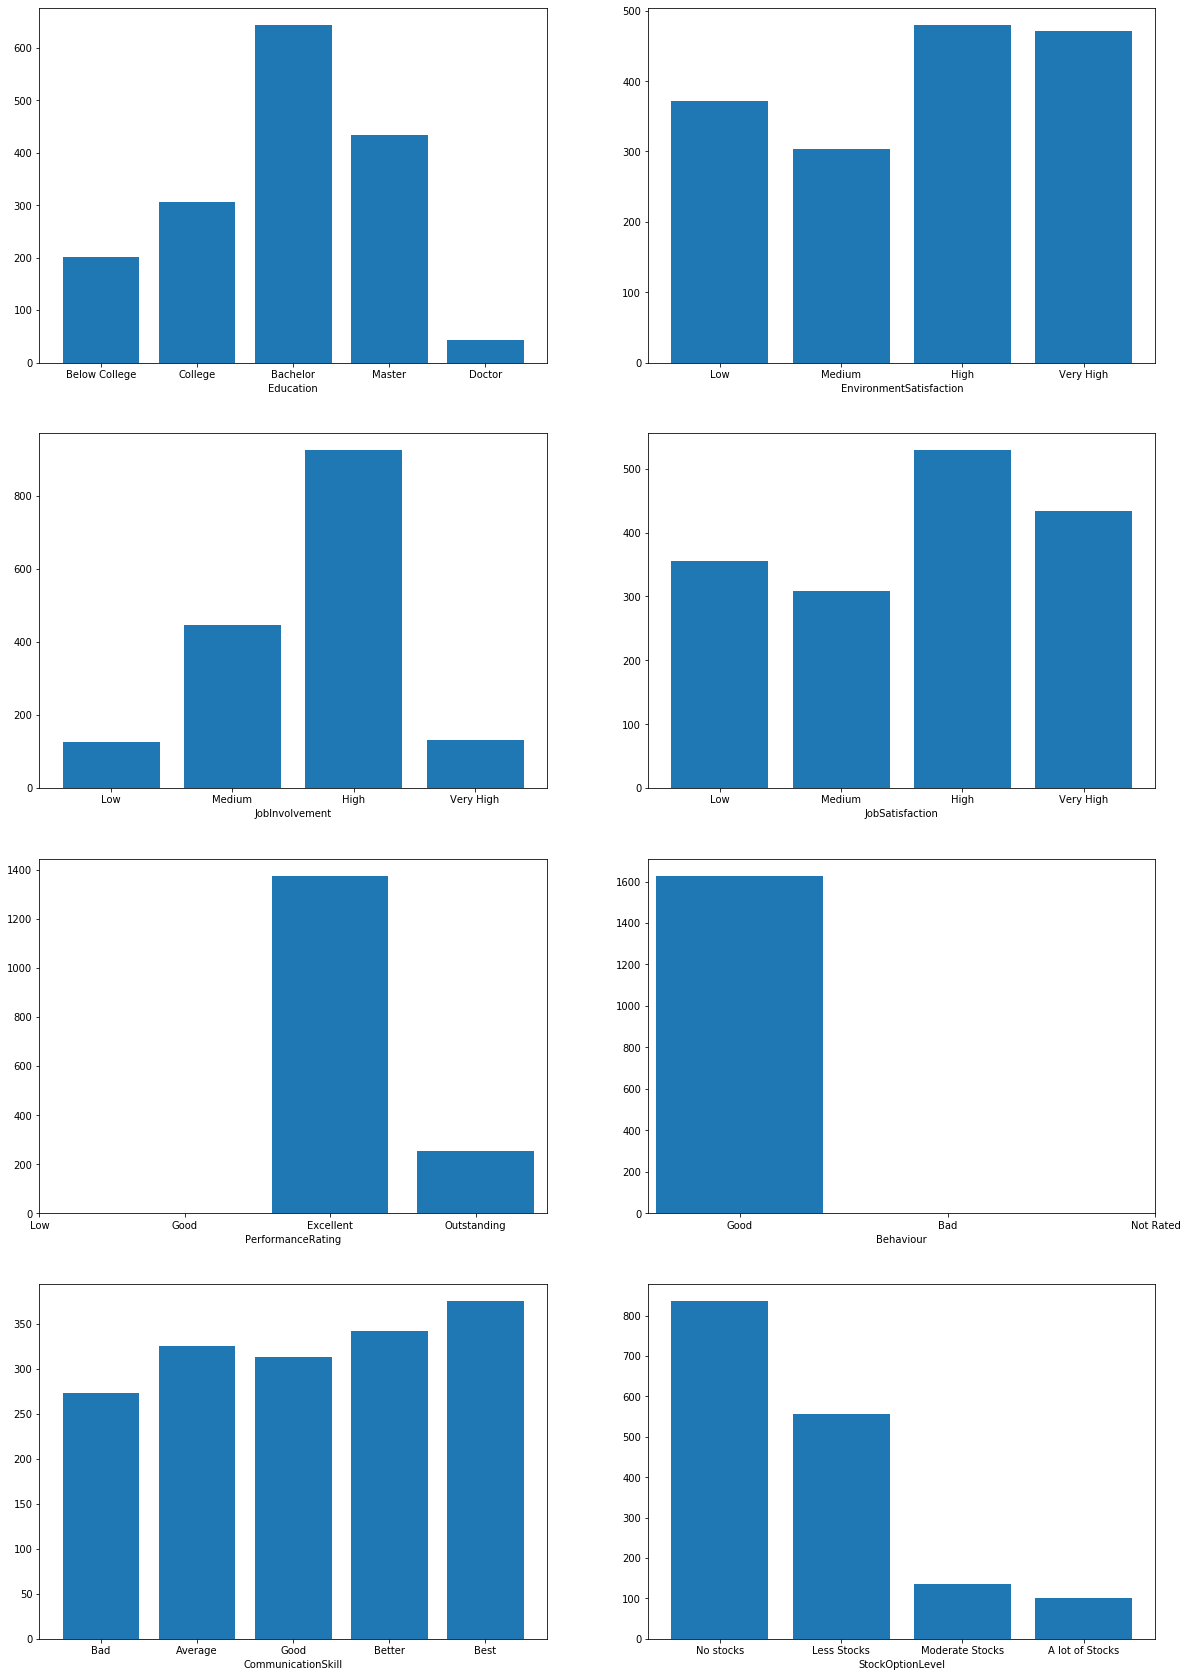

In [11]:
ordinal_value_mappers = {'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
                        'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                        'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                        'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
                        'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
                        'Behaviour': {1: 'Good', 2: 'Bad', 3: 'Not Rated'},
                        'CommunicationSkill': {1: 'Bad', 2: 'Average', 3: 'Good', 4: 'Better', 5: 'Best'},
                        'StockOptionLevel': {0: 'No stocks', 1: 'Less Stocks', 2: 'Moderate Stocks', 3: 'A lot of Stocks'}}

rows = int(len(ordinal_predictors) / 2)
fig, axes = plt.subplots(nrows = rows, ncols = 2, figsize = (20, 30))
pointer = 0
for row in range(rows):
    for col in range(2):
        if pointer < len(ordinal_predictors): 
            frequency = dict(numeric_data[ordinal_predictors[pointer]].value_counts())
            tick_mapper = ordinal_value_mappers[ordinal_predictors[pointer]]
            axes[row,col].bar(list(frequency.keys()), list(frequency.values()))
            axes[row,col].set_xticks(list(tick_mapper.keys()))
            axes[row,col].set_xticklabels(list(tick_mapper.values()))
            axes[row,col].set_xlabel(ordinal_predictors[pointer])
        pointer += 1

1. `Education`- This variable states the level of Education the employee has completed at the moment of joining IBM. We can see that most of the people are those who have earned a Bachelor's degree. A huge chunk of the population also belong to the Master's degree category. Very few Doctorates are employees at IBM. It is natural, such people usually tend to do research work and stay in colleges or research centres. Probably these few doctorates are in IBM for research work. We can see that cumulatively there are a lot of employees with `College` and `Below College` education level. _If I take a shot on who has a higher probability of leaving, I would name the employees with `College` and `Below College` education level categories. First reason would be that they might be less paid than their counter-parts with higher education. Second reason would be the urge to have atleast an education level which the majority people have, `Bachelor` in this case. The tendency of leaving should decrease as we move from `Bachelor` to `Doctor`_.


2. `EnvironmentSatisfaction`- Environment Satisfaction is a parameter that shows the feedback of the employees on the level of satisfaction they have with the current working environment. This might include the mentality of their peers (team-mates, team-leaders, managers etc) towards them, it can also indicate the satisfaction with quality workspace provided, quality of concerned people dealing with problems (problems such as setting up workspace, allocation of seating locations, resolving machine related problems etc). With a rough glance, one can see that there is a kind of step between `Medium` and `High`. It can also be seen that a lot of people have voted `Low`. This might be a concern and an area of deeper inspection for the HR division. _Taking a guess, I would say that the people who rated `Low` have a high probability of leaving, which decrease if we move to `Medium`, which further decreases as we move to `High` and `Very High`_.


3. `JobInvolvement`- This parameter signifies the extent to which a person is involved in the job given to him. This can be thought of as a parameter which roughly indicates the dedication/diligence of an employee towards their job. It can be seen that a huge number of employees have a `High` level of involvement with the job assigned to them. A fairly large number of employees also show a `Medium` level of engagement with their work. While a very few have `Low` and `Very High` involvement. _As a general rule of thumb, the people who have `Low` level of involvement with their job tend to have a higher chance of leaving. This comes from the generic correlation of `JobInvolvement` with the interest they have in their job. People with `Low` interest have a higher chance of leaving and joining a job that they have an interest in_.


4. `JobSatisfaction`- This parameter states the level of satisfaction an employee feels from the job they are assigned. The distribution of employee count for various values look very similar to the distribution for `EnvironmentSatisfaction`. _Could the data represented by the two features be highly correlated?_ __Check for the intersection of data between `JobSatisfaction` and `EnvironmentSatisfaction`! They seem to have a lot of similar distribution__. 


5. `PerformanceRating`- This parameter indicates the level of rating an employee has received against his performance from his manager. There are four catagories - `Low`, `Good`, `Excellent` and `Outstanding`. It is very nice (from an HR and manager's perspective) to see that there are no `Low` (as well as `Good`) ratings - indicating that all of the employees are performing at a level desired by their managers/peers. It can be seen that a very high number of employees have received an `Excellent` remark and only a few fraction have received an `Outstanding` remark. _I don't think this parameter would play any discriminative role in attrition by an employee. Were there some `Low` remarks, I would have been inclined to believe that some employees left because they weren't receiving any good remarks, thus leading to a poor morale to be in the team_.


6. `Behaviour`- This parameter indicates the behaviour of an employee - towards his peers, his juniors and his seniors. The relative importance between the three depends on the kind of system the organization has put up in order to receive feedbacks. The parameter has three valid values - `Good`, `Bad` and `Not Rated`. It can be seen that all the employees are rated `Good` - that's a bit suspicious given that it is logical to rate new employees as `Not Rated`, and we have seen that there are a lot of employees who have `0 - 1 year` value for `YearsAtCompany`. __In any case, I shall be dropping this parameter, as it has only one value - which can't provide any sort of discriminatory power__!


7. `CommunicationSkill`- This parameter indicates the level of communication skill an employee has. The employee count for each bin ranges from ~250 to just a bit over ~350. _I don't there would be a very strong relation between `Attrition` and this parameter. However, it can be a possibility that people with better communication skills are smarter in securing jobs, leading a higher chance of leaving the organization_.


8. `StockOptionLevel`- This reports the amount of stocks of the organization (IBM) an employee owns. The data is binned into four categories - `No stocks`, `Less Stocks`, `Moderate Stocks` and `A lot of Stocks`. It can be seen that the the employee count decreases as the level of stock they own increases. This is typical - not every organization hands out equity to all the employees, a portion of the equity is only awarded to high ranking employees. The amount in this portion increases with the rank. _A general rationale would be that people who have larger stock portion of the organization are less likely to leave it. Let's see if it holds out_.

In [12]:
def plot_distribution(data, feature, kde = True, with_hue = False, height = 10):
    if with_hue:
        grid = sns.FacetGrid(data, hue = 'Attrition', height = height, aspect = 1)
    else:
        grid = sns.FacetGrid(data, height = height, aspect = 1)
    grid = grid.map(sns.distplot, feature, kde = kde)
    if with_hue: plt.legend()

In [117]:
def plot_bars(data, feature, with_hue = False, height = 10, bins = None, print_frac = False):
    figure = plt.figure(figsize = (1.25 * height, height))
    if bins is not None:
        data = data.copy()
        mapper = {val: val for val in data[feature].unique()}
        for group in bins:
            mapper.update({val: group[0] for val in group[1:]})
        data[feature] = data[feature].map(mapper)
    if with_hue:
        sns.countplot(x = feature, data = data, hue = 'Attrition', dodge = True)
        if print_frac:
            val_attrition = dict(data.loc[data['Attrition'] == 1, feature].value_counts())
            val_tot = dict(data[feature].value_counts())
            val_attrition_frac = {key: round(value / val_tot[key], 3) for key, value in val_attrition.items()}
            print({key: val_attrition_frac[key] for key in sorted(val_attrition_frac)})
    else:
        sns.countplot(x = feature, data = data, color = 'SkyBlue')
    if with_hue: plt.legend()
    plt.show()

On closer inspection, I saw that there are many cases where `YearsAtCompany` == `YearsSinceLastPromotion`. These cases are curious, as they indicate that the employee received a promotion as soon as they joined office. Let's examine these cases to see if we can find any insights.

In [14]:
numeric_data_equal_yslp = numeric_data[numeric_data['YearsSinceLastPromotion'] == numeric_data['YearsAtCompany']]
print(numeric_data_equal_yslp.shape[0])

246


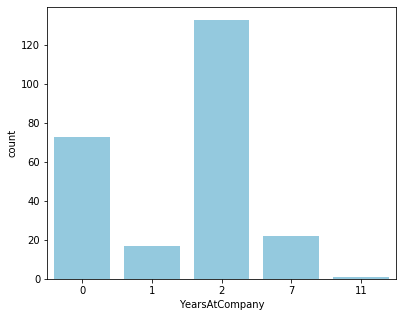

In [83]:
plot_bars(numeric_data_equal_yslp, feature = 'YearsAtCompany', height = 5)

Let's examine each mark separately.

In [16]:
numeric_data_equal_yslp_zero = numeric_data_equal_yslp[numeric_data_equal_yslp['YearsAtCompany'] == 0]
numeric_data_equal_yslp_one = numeric_data_equal_yslp[numeric_data_equal_yslp['YearsAtCompany'] == 1]
numeric_data_equal_yslp_two = numeric_data_equal_yslp[numeric_data_equal_yslp['YearsAtCompany'] == 2]
numeric_data_equal_yslp_seven = numeric_data_equal_yslp[numeric_data_equal_yslp['YearsAtCompany'] == 7]

{0: 15,
 1: 11,
 3: 6,
 4: 6,
 5: 12,
 6: 2,
 7: 6,
 8: 7,
 10: 2,
 12: 1,
 13: 1,
 14: 2,
 15: 1,
 22: 1}

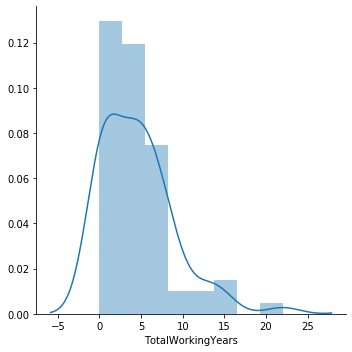

In [17]:
plot_distribution(numeric_data_equal_yslp_zero, feature = 'TotalWorkingYears', height = 5)
count = numeric_data_equal_yslp_zero['TotalWorkingYears'].value_counts()
{k: v for k, v in sorted(count.items(), key=lambda item: item[0])}

Above you can see that there are employees who have `0` total working experience, i.e. freshers. These values can't be counted as promoted employees. For such values, there should be an indicator which indicates that these employees haven't been actually promoted.

{1: 16, 24: 1}

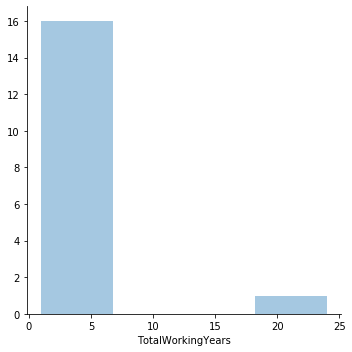

In [18]:
plot_distribution(numeric_data_equal_yslp_one, feature = 'TotalWorkingYears', height = 5, kde = False)
count = numeric_data_equal_yslp_one['TotalWorkingYears'].value_counts()
{k: v for k, v in sorted(count.items(), key=lambda item: item[0])}

Above you can see that there are employees who have `1` total working experience, i.e. IBM is their first organization (since `YearsAtCompany` is also `1`).

{2: 37,
 3: 7,
 4: 23,
 5: 5,
 6: 10,
 7: 24,
 8: 10,
 9: 1,
 10: 2,
 12: 1,
 15: 6,
 16: 1,
 17: 1,
 19: 1,
 22: 1,
 23: 1,
 24: 1,
 32: 1}

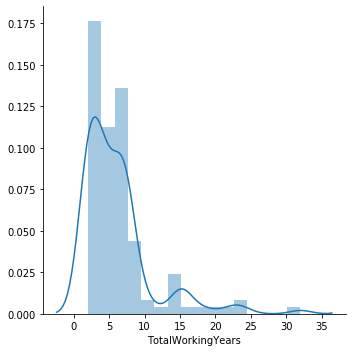

In [19]:
plot_distribution(numeric_data_equal_yslp_two, feature = 'TotalWorkingYears', height = 5)
count = numeric_data_equal_yslp_two['TotalWorkingYears'].value_counts()
{k: v for k, v in sorted(count.items(), key=lambda item: item[0])}

Above you can see that there are employees who have `2` total working experience, i.e. IBM is their first organization (since `YearsAtCompany` is also `2`).

{7: 6, 8: 4, 10: 2, 11: 1, 15: 6, 17: 2, 21: 1}

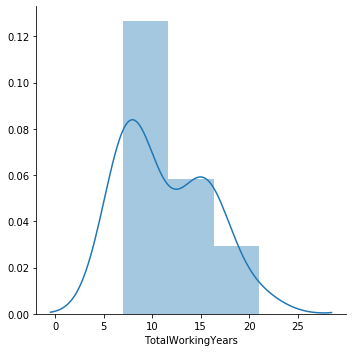

In [20]:
plot_distribution(numeric_data_equal_yslp_seven, feature = 'TotalWorkingYears', height = 5)
count = numeric_data_equal_yslp_seven['TotalWorkingYears'].value_counts()
{k: v for k, v in sorted(count.items(), key=lambda item: item[0])}

Above you can see that there are employees who have `7` total working experience, i.e. IBM is their first organization (since `YearsAtCompany` is also `7`).

Now, from the above, the following conclusion can be clearly stated - `IBM considers a job offer as a promotion.` We can see above that all the freshers who have joined IBM have been marked as "promoted employees". Such a value is actually non-conforming with the title of the feature. __I won't be taking these values into consideration while analyzing `YearsSinceLastPromotion`. I will be defining a new feature - `IsPromotedByIBM`, which will indicate if the employees have received any promotion in IBM (other than the joining letter)__.

In [21]:
dataset['IsPromotedByIBM'] = 1
dataset.loc[numeric_data_equal_yslp.index, 'IsPromotedByIBM'] = 0

In [22]:
dataset[dataset['IsPromotedByIBM'] == 0].shape

(246, 29)

In [23]:
data_with_promotion = dataset[dataset['IsPromotedByIBM'] == 1]

Now, I will be examining the `Attrition` tendencies of people who have been actually given a promotion after joining their posts in IBM.

{0: 0.522, 1: 0.39, 2: 0.373, 3: 0.349, 4: 0.268, 5: 0.156, 6: 0.513, 7: 0.658, 9: 0.714, 10: 0.556, 11: 0.278, 13: 0.455, 14: 0.455, 15: 0.385}


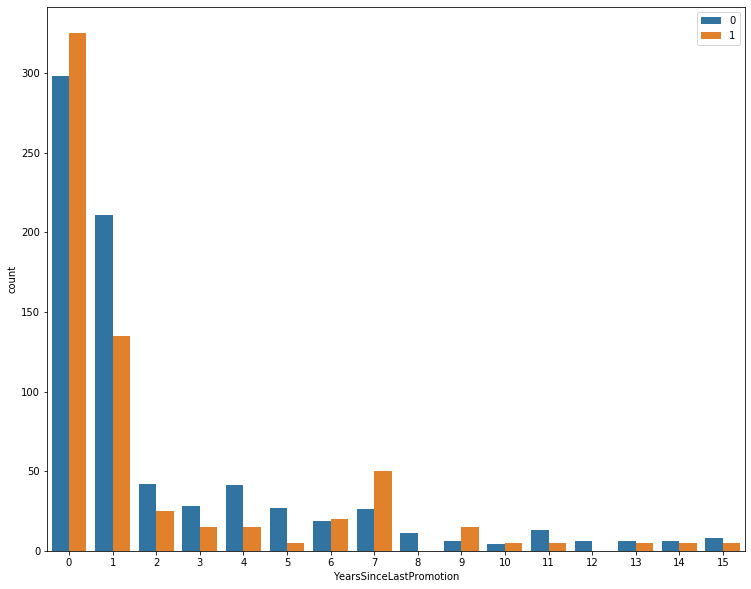

In [118]:
plot_bars(data_with_promotion, feature = 'YearsSinceLastPromotion', with_hue = True, height = 10, print_frac = True)

From the above bar plot, it can be seen that there are two regions where the distinction is appreciable. The first region ranges from `1` to `5`, where there is a very low tendency of `Attrition`. The second region includes the marker `7`, where there is a significant fraction of employees receiving `Attrition`, around double!

There seems to be a sudden increase in `Attrition` rate from `5` to `6`. It might be beneficial to analyse this trend. We will be doing this analysis later on

For employees who haven't been promoted by IBM, I should be setting the values to NaN, as I don't want them to be interfering a split on `YearsSinceLastPromotion`. Speaking in a practical way, what I can do is to find nearest neighbors for all these points and replace the value nn's value. Let's go forward with other variables, and after shortlisting the final list of variables, we can apply any NN algorithm to impute values.

{0: 0.63, 1: 0.456}


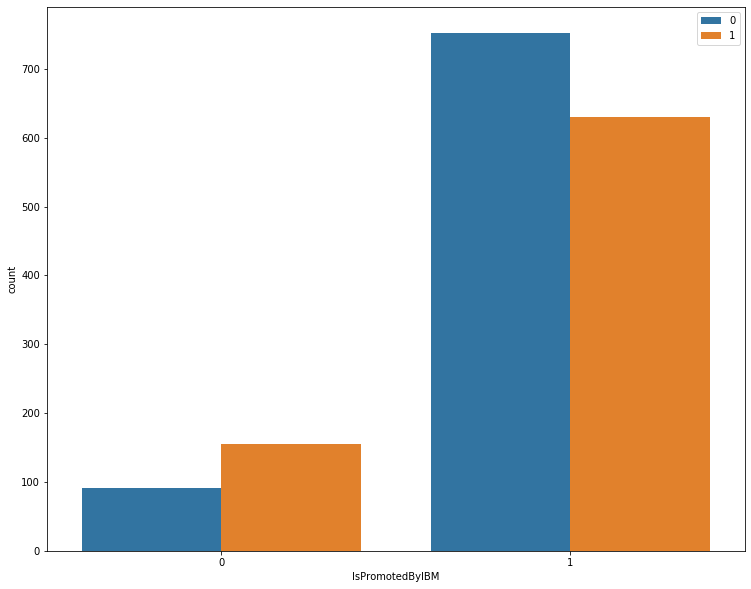

In [128]:
plot_bars(dataset, feature = 'IsPromotedByIBM', with_hue = True, print_frac = True)

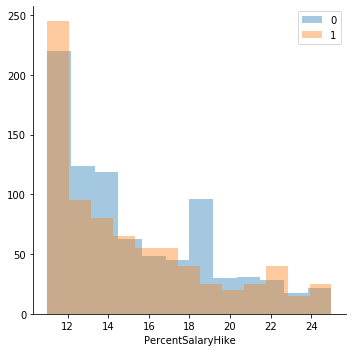

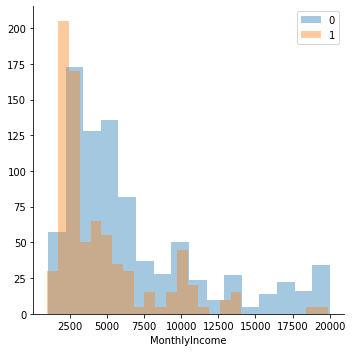

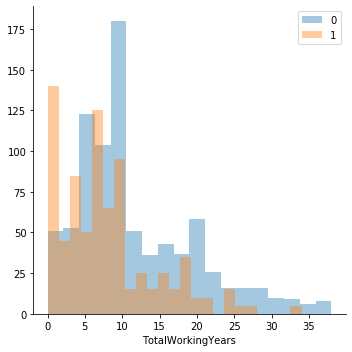

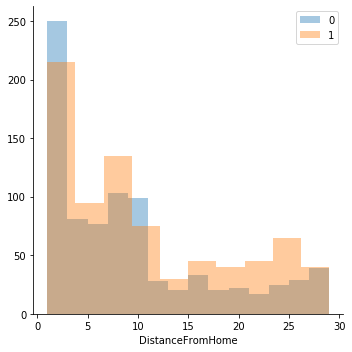

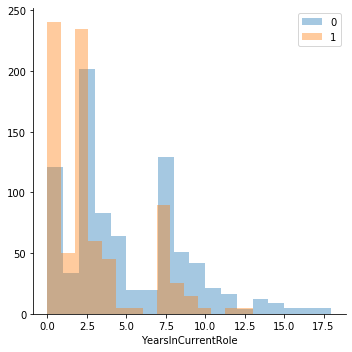

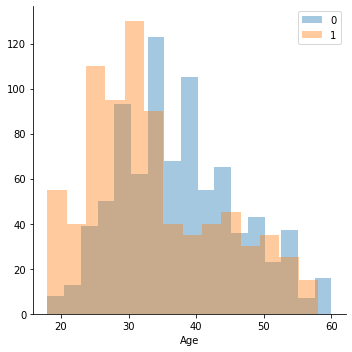

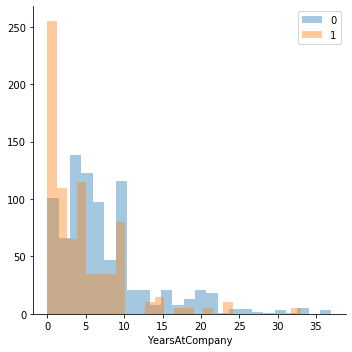

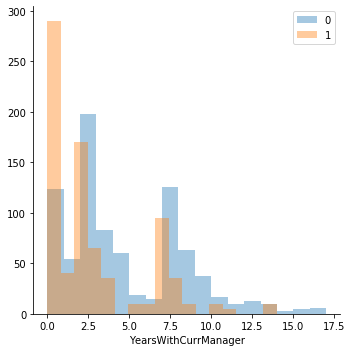

In [276]:
features = ['PercentSalaryHike', 'MonthlyIncome', 'TotalWorkingYears', 'DistanceFromHome', 'YearsInCurrentRole', 'Age', 'YearsAtCompany', 'YearsWithCurrManager']
for feature in features:
    plot_distribution(dataset, feature, kde = False, with_hue = True, height = 5)

From the above it seems that, the features `MonthlyIncome`, `TotalWorkingYears`, `YearsInCurrentRole`,  `YearsAtCompany`, and `YearsWithCurrManager` are pretty important features, which are very close to abiding by the rules of Logistic Regression.

The feature `DistanceFromHome` seems very inconclusive, and it might be very safe to drop it. It might just be causing Over-Fitting.

The features `PercentSalaryHike` and `Age` remain to be examined for any additional information that they are capable of providing.

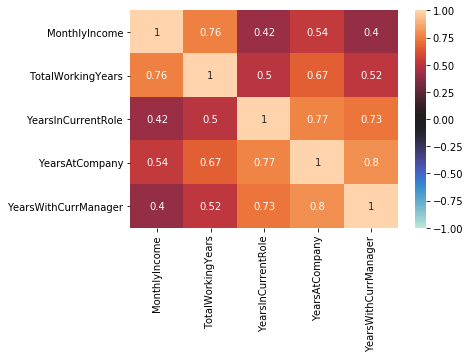

In [284]:
correlation = dataset[strong_vars].corr()
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, center = 0)

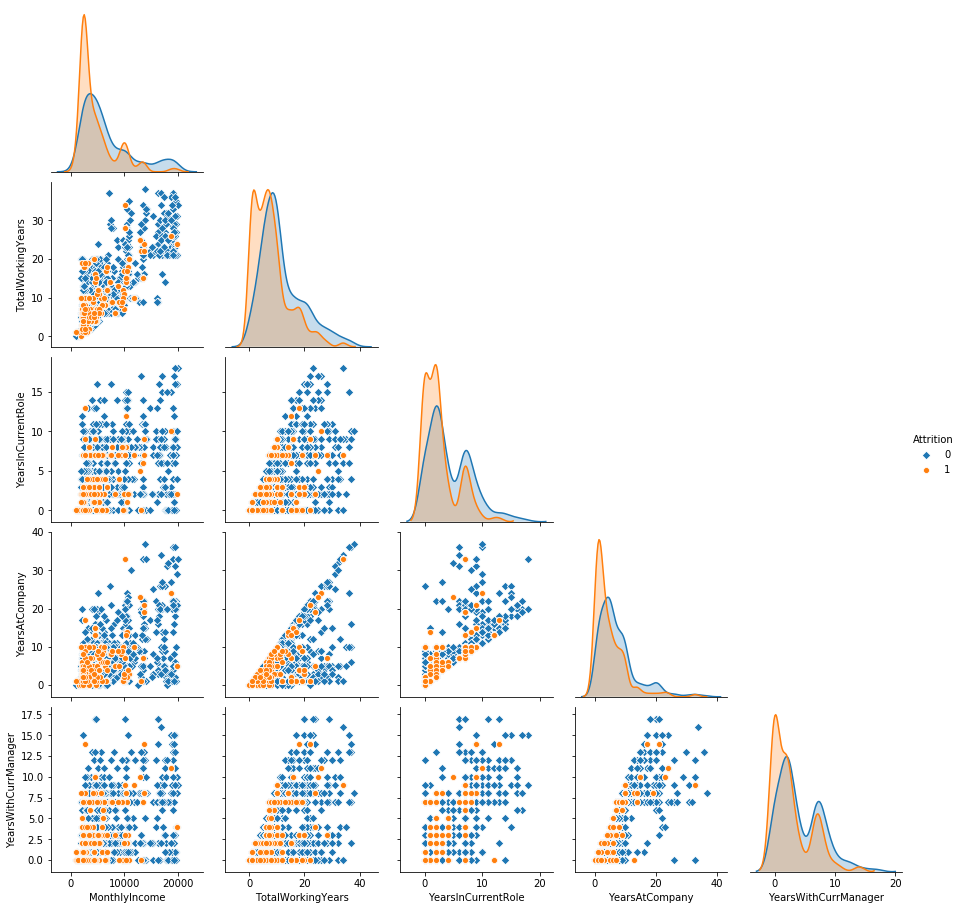

In [281]:
strong_vars = ['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager']
sns.pairplot(dataset, hue = 'Attrition', markers = ['D', 'o'], vars = strong_vars, corner = True)

From the above heatmap we can see that the variable `YearsWithCurrManager` has very strong correlations with `YearsAtCompany` and `YearsInCurrentRole`. However, this doesn't prove that any information added by `YearsWithCurrManager` has already been added by the other two.

From the pairplot, we can see that appreciable amount of predicting power is imparted through the five strong variables.

{0: 0.429, 1: 0.527, 2: 0.395, 3: 0.325, 4: 0.445, 5: 0.571, 6: 0.612, 7: 0.556, 8: 0.326, 9: 0.597}


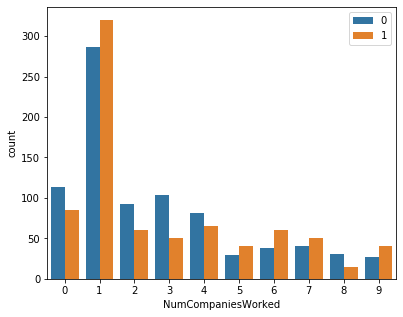

{0: 0.676, 1: 0.513, 2: 0.508, 3: 0.44, 4: 0.576, 5: 0.414, 6: 0.25}


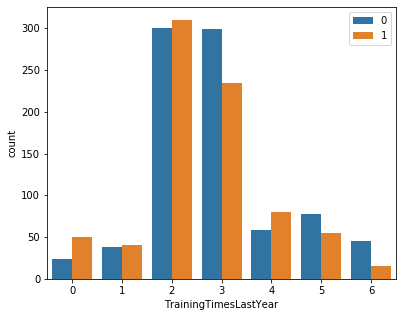

{0: 0.539, 1: 0.413, 2: 0.525, 3: 0.349, 4: 0.268, 5: 0.156, 6: 0.513, 7: 0.612, 9: 0.714, 10: 0.556, 11: 0.263, 13: 0.455, 14: 0.455, 15: 0.385}


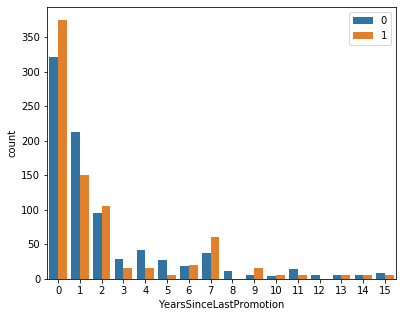

In [319]:
features = ['NumCompaniesWorked', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']
for feature in features:
    plot_bars(dataset, feature, with_hue = True, height = 5, print_frac = True)

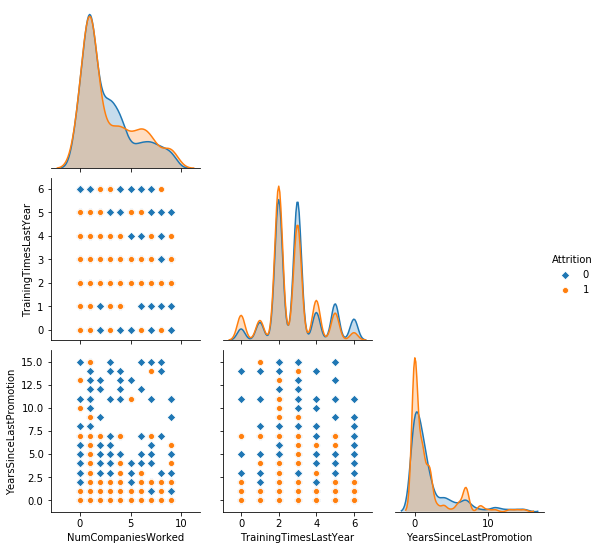

In [320]:
sns.pairplot(dataset, hue = 'Attrition', markers = ['D', 'o'], vars = features, corner = True)

From the above, it can be clearly deduced that the variables `TrainingTimesLastYear` and `NumCompaniesWorked` are not as strong predictors as I would want them. Using these might lead to over-fitting.

{1: 0.498, 2: 0.507, 3: 0.489, 4: 0.461, 5: 0.349}


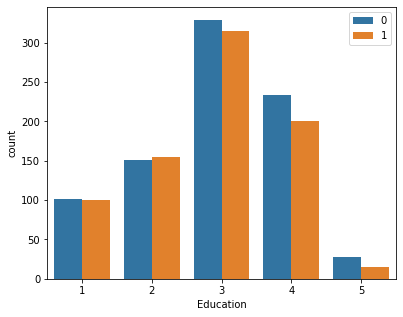

{1: 0.605, 2: 0.444, 3: 0.458, 4: 0.434}


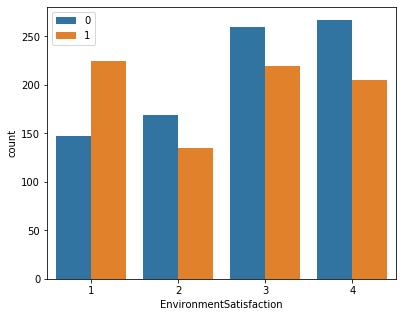

{1: 0.714, 2: 0.526, 3: 0.449, 4: 0.346}


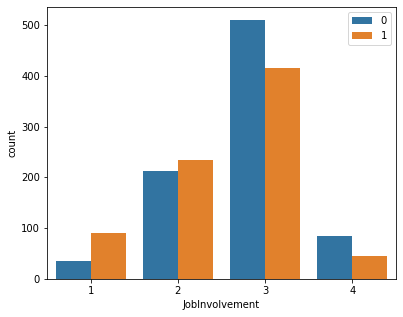

{1: 0.59, 2: 0.502, 3: 0.491, 4: 0.369}


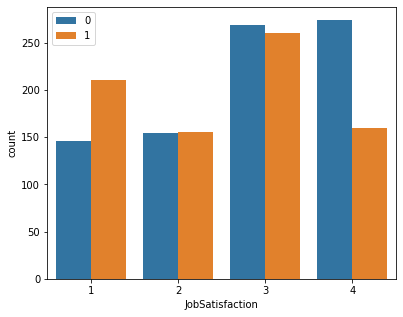

{3: 0.48, 4: 0.494}


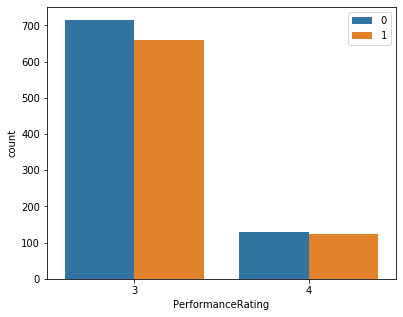

{1: 0.366, 2: 0.508, 3: 0.447, 4: 0.497, 5: 0.56}


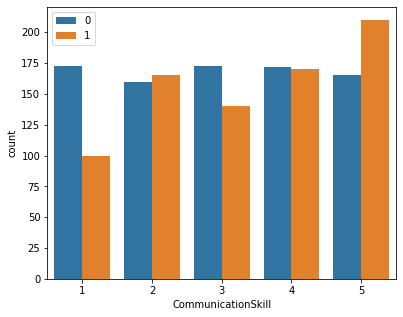

{0: 0.61, 1: 0.323, 2: 0.333, 3: 0.5}


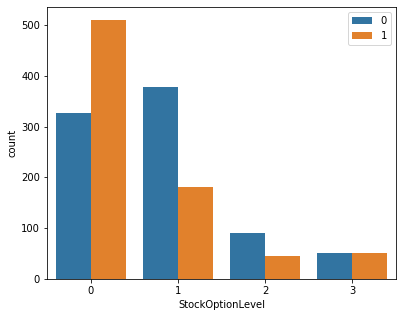

In [388]:
features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'CommunicationSkill', 'StockOptionLevel']
for feature in features:
    plot_bars(dataset, feature, with_hue = True, height = 5, print_frac = True)

At one glance it can be seen that variables other than `PerformanceRating` are fairly good discriminators at various ordinal levels. 

I am looking for features where the fractions change appreciably while moving along the bins. This signifies that a fruitful split can be done by the Decision Tree algorithm we use. This ideology renders the feature - `Education` very less useful.

{'Non-Travel': 0.292, 'Travel_Frequently': 0.633, 'Travel_Rarely': 0.448}


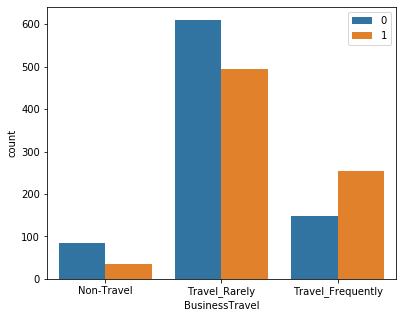

{'Human Resources': 0.556, 'Research & Development': 0.424, 'Sales': 0.572}


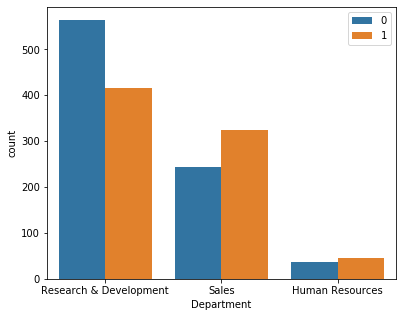

{'Human Resources': 0.625, 'Life Sciences': 0.441, 'Marketing': 0.584, 'Medical': 0.451, 'Other': 0.412, 'Technical Degree': 0.617}


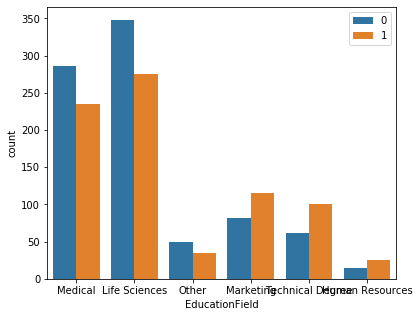

{'Female': 0.467, 'Male': 0.492}


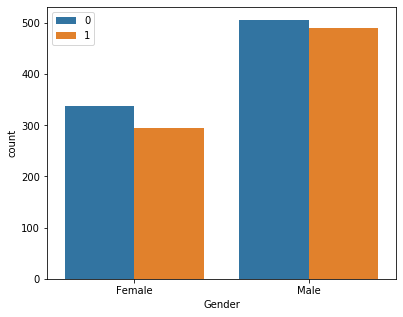

{'Healthcare Representative': 0.227, 'Human Resources': 0.625, 'Laboratory Technician': 0.581, 'Manager': 0.222, 'Manufacturing Director': 0.248, 'Research Scientist': 0.484, 'Sales Executive': 0.507, 'Sales Representative': 0.785}


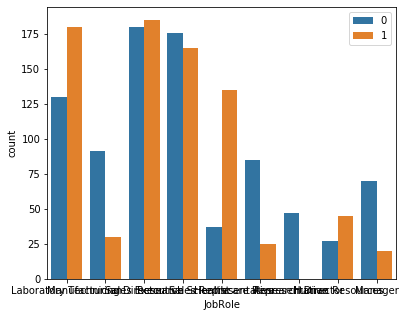

{'Divorced': 0.394, 'Married': 0.389, 'Single': 0.627}


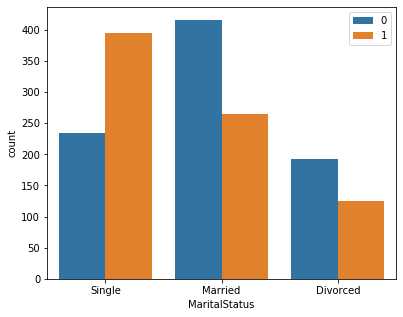

{'No': 0.355, 'Yes': 0.685}


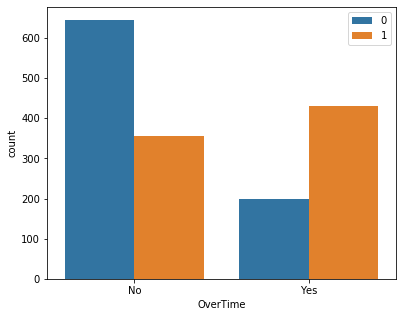

In [400]:
features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for feature in features:
    plot_bars(dataset, feature, with_hue = True, height = 5, print_frac = True)

Using the same logic as above, `Gender` is a feature that can be omitted from the final calculations.

In [679]:
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score as ars
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

def pre_process(data, encoder, vars, cat_vars, training = True):
    if vars != 'all':
        if training: vars.append('Attrition')
        else: vars.append('Id')
        if cat_vars != 'none':
            vars.extend(cat_vars)
        data = data.loc[:, vars]
        
    if not training:
        data.loc[data['YearsSinceLastPromotion'] == data['YearsAtCompany'], 'YearsSinceLastPromotion'] = 7
        
    if cat_vars != 'none':
        if training: encoded = pd.DataFrame(encoder.fit_transform(data[features]).toarray())
        else: encoded = pd.DataFrame(encoder.transform(data[features]).toarray())
        data = pd.concat([data, encoded], axis = 1)
        data = data.drop(cat_vars, axis = 1)
        
    print('Fitting model with {} features'.format(len(vars)))
    return data

def build_model(data, test_split = 0.2, vars = 'all', cat_vars = 'none'):
    encoder = OneHotEncoder()
    final_dataset = pre_process(data, encoder, vars, cat_vars)
    
    y = final_dataset['Attrition']
    X = final_dataset.drop(['Attrition'], axis = 1)
    cv = KFold(n_splits = 10, shuffle = True, random_state = 8)
    
    train_score = []
    test_score = []
    models = []
    
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        model = DecisionTreeClassifier(min_samples_split = 250)
#         model = LogisticRegression()
#         model = RandomForestClassifier(n_estimators = 500, max_depth = 3)
#         model = KNeighborsClassifier(n_neighbors = 30, leaf_size = 50)
#         model_init.fit(X_train, y_train)
        model = GradientBoostingClassifier(n_estimators = 500, min_samples_split = 100)
        model = model.fit(X_train, y_train)
        models.append(model)
        y_pred_train = model.predict(X_train)
        train_score.append(ars(y_train, y_pred_train))
        y_pred_test = model.predict(X_test)
        test_score.append(
            ars(y_test, y_pred_test))
    print('AUC-ROC score on train data: {}'.format(np.mean(train_score)))
    print('AUC-ROC score on test data: {}'.format(np.mean(test_score))) 
    
    final_model = models[np.argmax(test_score)]
    print('Highest test score: {}'.format(max(test_score)))
    
    return final_model, encoder

def predict(data, model, encoder, vars, cat_vars = 'none'):
    final_dataset = pre_process(data, encoder, vars, cat_vars, training = False)
    X = final_dataset.drop(['Id'], axis = 1)
    y_pred = model.predict_proba(X)
    submission = pd.DataFrame(columns = ['Id', 'Attrition'])
    submission['Id'] = final_dataset['Id']
    submission['Attrition'] = y_pred
    
    return submission

In [675]:
model_data = dataset.copy()
model_data.loc[model_data['IsPromotedByIBM'] == 0, 'YearsSinceLastPromotion'] = 7

model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   Attrition                1628 non-null   int64 
 2   BusinessTravel           1628 non-null   object
 3   Department               1628 non-null   object
 4   DistanceFromHome         1628 non-null   int64 
 5   Education                1628 non-null   int64 
 6   EducationField           1628 non-null   object
 7   EmployeeNumber           1628 non-null   int64 
 8   EnvironmentSatisfaction  1628 non-null   int64 
 9   Gender                   1628 non-null   object
 10  JobInvolvement           1628 non-null   int64 
 11  JobRole                  1628 non-null   object
 12  JobSatisfaction          1628 non-null   int64 
 13  MaritalStatus            1628 non-null   object
 14  MonthlyIncome            1628 non-null  

In [680]:
model, encoder = build_model(model_data, vars = ['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'CommunicationSkill', 'StockOptionLevel', 'Age'], cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'])

Fitting model with 19 features
AUC-ROC score on train data: 0.9993392050021155
AUC-ROC score on test data: 0.9461458492709409
Highest test score: 0.9574468085106382


In [542]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [672]:
submission = predict(test_data, model, encoder, vars = ['MonthlyIncome', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'CommunicationSkill', 'StockOptionLevel', 'Age'], cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'])

Fitting model with 13 features


In [673]:
submission.to_csv('submission_7.csv')

In [494]:
import warnings 
warnings.simplefilter('ignore')

In [638]:
from sklearn.neighbors import KernelDensity

def find_delta(vector_data, density_map):
    delta_map = {}

    max_density_data_pt = max(density_map, key= lambda key: density_map[key])

    for data_pt_one, density_one in density_map.items():
        delta_array = []
        FLAG_MAX_DENSITY = False
        if density_one == density_map[max_density_data_pt]: FLAG_MAX_DENSITY = True

        for data_pt_two, density_two in density_map.items():
            if data_pt_one == data_pt_two: continue
            if density_one >= density_two and not FLAG_MAX_DENSITY: continue
            distance = np.linalg.norm(vector_data[data_pt_one] - vector_data[data_pt_two], ord = 0.5)
            delta_array.append(distance)
        
        if FLAG_MAX_DENSITY: delta_map[data_pt_one] = max(delta_array)
        else: delta_map[data_pt_one] = min(delta_array)

    return delta_map 

def draw_decision_graph(data, cols):
    data = data[cols].values
    
    estimator = KernelDensity(kernel = 'tophat', bandwidth = 0.2)
    estimator.fit(data)
    density_estimates = {}
    for idx, vector in enumerate(data):
        density_estimates[idx] = estimator.score_samples(vector.reshape(1, -1))
        
    delta_estimates = find_delta(data, density_estimates)
    
    densities = []
    deltas = []
    for key, density in density_estimates.items():
        densities.append(density)
        deltas.append(delta_estimates[key])
    
    plt.scatter(densities, deltas)